In [1]:
import hdf5storage
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from analysis_util import *
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib.ticker import MaxNLocator


import seaborn as sns
'''this script test the hypothesis whether people respond to a fixed bound
pepole  '''
# global setting f
plt.rcParams.update({"font.size": 18})
colors = sns.color_palette("deep")
sns.set(style="whitegrid")
# top level dir 
# 




In [2]:

PROJECT_DIR = "/data/rwchain-all/round2"
BEH_DIR = os.path.join(PROJECT_DIR, "rwchain-beh/data")
EEG_DIR = os.path.join(PROJECT_DIR, "rwchain-eeg")
ALL_BEH_DIR = os.path.join(PROJECT_DIR, 'rwchain-beh', 'combined')


In [3]:
CODE_DIR = "/home/jenny/evidence-chain/"
FIG_DIR = os.path.join(CODE_DIR, "figs/rw_varying_bound_acc/")

In [4]:

# Check if the directory exists
if not os.path.exists(FIG_DIR):
    # Create the directory
    os.makedirs(FIG_DIR)
    print(f"Directory '{FIG_DIR}' was created.")
else:
    print(f"Directory '{FIG_DIR}' already exists.")

Directory '/home/jenny/evidence-chain/figs/rw_varying_bound_acc/' already exists.


In [5]:
stimdur = "100"

In [6]:

list_of_subj = os.listdir(BEH_DIR)
list_of_subj.sort()
# list_of_subj = [list_of_subj[5]]

df = pd.read_pickle(os.path.join(ALL_BEH_DIR, 'all_df_concat.pkl'))
# organize some columsn
 
df['key'][df['key'] == '[5]'] = 1
df['key'][df['key'] == '[3]'] = 1
df['key'][df['key'] == '[2]'] = 0
df['cumsum'] = df['sequence_clean'].apply(lambda x: [sum(x[:i+1]) for i in range(len(x))])

# get rid of a ;pw acc subject
df = df[df['sid']!='s108']

if stimdur == '100':
    df = df[df['stimDur'] == 0.1]
if stimdur == '250':
    df = df[df['stimDur'] == 0.25]
# df = df[df['stimDur'] != 0.5]
# df = df[df['stimDur'] != 0.05]
# df = df[df['stimDur'] == 0.1]



/tmp/ipykernel_10336/100844696.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'][df['key'] == '[5]'] = 1
/tmp/ipykernel_10336/100844696.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'][df['key'] == '[3]'] = 1
/tmp/ipykernel_10336/100844696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key'][df['key'] == '[2]'] = 0


In [7]:
# correct the count
df = correct_samples_by_condition(df)

cumsum = np.array(df['cumsum'].to_list())
sequence =  np.array(df['sequence_clean'].to_list())
count = df['count_corrected'].to_numpy()

In [8]:
cumsum

array([[  1.,   0.,   1., ...,   4.,   3.,   4.],
       [ -1.,  -2.,  -1., ...,  -8.,  -7.,  -6.],
       [ -1.,  -2.,  -1., ...,  10.,  11.,  12.],
       ...,
       [  1.,   2.,   1., ..., -14., -13., -14.],
       [ -1.,   0.,  -1., ..., -10., -11., -12.],
       [ -1.,  -2.,  -3., ..., -12., -11., -10.]])

In [9]:
df.shape

(3450, 13)

In [10]:
df.head()


,time,bytetime,press,count,key,stimDur,Bias,sequence,block,sequence_clean,sid,cumsum,count_corrected
100,1.3500020503997803,1345,[1],13,1,0.1,0.12,[ 1. -1. 1. -1. 1. -1. -1. 1. 1. 1. 1. ...,2,"[1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1...",s102,"[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, -1.0, 0.0, 1.0,...",11
101,1.249974012374878,1234,[1],12,0,0.1,0.12,[-1. -1. 1. 1. -1. -1. 1. 1. -1. 1. -1. -...,2,"[-1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -...",s102,"[-1.0, -2.0, -1.0, 0.0, -1.0, -2.0, -1.0, 0.0,...",10
102,1.399996042251587,1396,[1],13,1,0.1,0.12,[-1. -1. 1. -1. 1. -1. 1. 1. 1. -1. 1. ...,2,"[-1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1...",s102,"[-1.0, -2.0, -1.0, -2.0, -1.0, -2.0, -1.0, 0.0...",11
103,2.3166611194610596,2306,[1],23,1,0.1,0.12,[ 1. -1. 1. 1. 1. 1. -1. -1. -1. 1. -1. ...,2,"[1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1...",s102,"[1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 3.0, 2.0, 1.0, ...",21
104,1.0333290100097656,1017,[1],10,0,0.1,0.12,[-1. -1. -1. -1. 1. -1. 1. -1. -1. -1. 1. ...,2,"[-1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0,...",s102,"[-1.0, -2.0, -3.0, -4.0, -3.0, -4.0, -3.0, -4....",8


In [11]:
count.max()

29

In [12]:
# create a matrix of +1 and -1 with NaNs if the chain terminates

chain_matrix = get_chain_matrix(sequence, count)


In [13]:
# get the acc 


# calculate terminated chains
cumsum_stop_list = []

for c in range(cumsum.shape[0]):
    cumsum_stop = cumsum[
        c, : int(count[c]+1)
    ]  # for example, if rt adjusted i 708, for 250ms, one have seen 3 stimulus.
    cumsum_stop_list.append(cumsum_stop)
 

level_at_response = [i[-1] for i in cumsum_stop_list]
resp = df['key'].tolist()

acc = []
bound = []
for num, k in zip(level_at_response, resp):
    if (num <= 0 and k == 0) or (num >= 0 and k == 1):
        acc.append(1)
    else:
        acc.append(0)
    bound.append(np.abs(num))
print(sum(acc))
df['acc'] = acc
df['bound'] = bound



cumsum = np.array(df[df['acc']==1]['cumsum'].to_list())
sequence =  np.array(df[df['acc']==1]['sequence_clean'].to_list())
count = df[df['acc']==1]['count_corrected'].to_numpy()

chain_matrix = get_chain_matrix(sequence, count)


2939


In [14]:
df.shape

(3450, 15)

In [15]:

# set the fixed bound


position_range = np.arange(2,15)

TRUE_N = []
TOTAL_N = []
FPR_TRAIN =[]
FPR_TEST =[]
TPR_TRAIN=[]
TPR_TEST=[]
AUC_TRAIN =[]
AUC_TEST =[]
POSITION_OF_SAMPLES=[]
N_TRAIN =[]
N_TEST = []

AUC_THRESH_TRAIN = []
AUC_THRESH_TEST =[]

for position_terminate in position_range:

    dataset, dataset_resp = make_dataset(position_terminate, count, chain_matrix)
    TRUE_N.append(dataset_resp.sum())
    TOTAL_N.append(len(dataset))
    x_train, x_test, y_train, y_test = train_test_split(
        dataset, dataset_resp, test_size=0.3, random_state=2024
    )
    N_TRAIN.append(len(x_train))
    N_TEST.append(len(x_test))
    # integrate evidence    
    x_train_evidence = get_abs_evidence(x_train)[:,-1]
    x_test_evidence = get_abs_evidence(x_test)[:,-1]

    # predict prob
    # predict prob
    # y_pred_prob_train = sigmoid(x_train_evidence)
    # y_pred_prob_test = sigmoid(x_test_evidence)
    y_pred_prob_train = x_train_evidence
    y_pred_prob_test = x_test_evidence

    # plot ROC
    fpr_train, tpr_train, thresh_train = metrics.roc_curve(y_train, y_pred_prob_train)
    fpr_test, tpr_test, thresh_test = metrics.roc_curve(y_test, y_pred_prob_test)
    auc_train = metrics.auc(fpr_train, tpr_train)
    auc_test = metrics.auc(fpr_test, tpr_test)
    
    
    FPR_TRAIN.append(fpr_train)
    FPR_TEST.append(fpr_test)
    TPR_TRAIN.append(tpr_train)
    TPR_TEST.append(tpr_test)
    AUC_TRAIN.append(auc_train)
    AUC_TEST.append(auc_test)
    POSITION_OF_SAMPLES.append(position_terminate)
    AUC_THRESH_TRAIN.append(thresh_train)
    AUC_THRESH_TEST.append(thresh_test)

    # plt.scatter(x_train_evidence,y_pred_prob_train)
    # plt.show()


In [16]:
x_train.shape

(715, 15)

In [17]:
get_abs_evidence(x_train)

array([[ 1.,  2.,  3., ...,  1.,  2.,  1.],
       [ 1.,  2.,  3., ...,  1.,  0.,  1.],
       [ 1.,  0.,  1., ...,  3.,  2.,  1.],
       ...,
       [ 1.,  0.,  1., ...,  1.,  2.,  3.],
       [ 1.,  2.,  3., ..., 13., 14., 15.],
       [ 1.,  0.,  1., ...,  3.,  4.,  3.]])

In [18]:
# def plot_performance_matrix(performance_matrix):
#     fig, ax = plt.subplots(1,1,figsize = (6,4))
#     performance_matrix = np.ma.masked_where(performance_matrix==0,performance_matrix)
#     cmap = mpl.cm.get_cmap("OrRd").copy()

#     cmap.set_bad(color='black')
#     # plt.imshow(performance_matrix_train,interpolation='none', vmin=0.5, vmax=1, cmap = "OrRd")
#     ax.set_ylabel("level of evidence integrated")
#     ax.set_xlabel("position at termination")
#     ax.set_xticks(np.arange(1, max(position_range)+2))
#     ax.set_yticks(fixed_bound)

#     # plt.colorbar()
#     im = ax.pcolor(performance_matrix, vmin=0.5, vmax=0.8, cmap = cmap,edgecolors='k', linewidths=1)
#     fig.colorbar(im)
#     return fig, ax

In [19]:
# performance_matrix_train = np.zeros((max(fixed_bound), max(position_range+1)))
# performance_matrix_test = np.zeros((max(fixed_bound), max(position_range+1)))

In [20]:
# fig, ax = plot_performance_matrix(performance_matrix_test)

In [21]:
GMEANS_train=[]
IDX_train=[]
for i in range(len(TPR_TRAIN)):
    gmeans = np.sqrt(TPR_TRAIN[i] * (1-FPR_TRAIN[i]))
    ix = np.argmax(gmeans)
    GMEANS_train.append(AUC_THRESH_TRAIN[i][ix])
    IDX_train.append(ix)
    

In [22]:
GMEANS_test=[]
IDX_test=[]
for i in range(len(TPR_TEST)):
    gmeans = get_gmeans(TPR_TEST[i], FPR_TEST[i])
    ix = np.argmax(gmeans)
    GMEANS_test.append(AUC_THRESH_TEST[i][ix])
    IDX_test.append(ix)

/tmp/ipykernel_10336/513116939.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


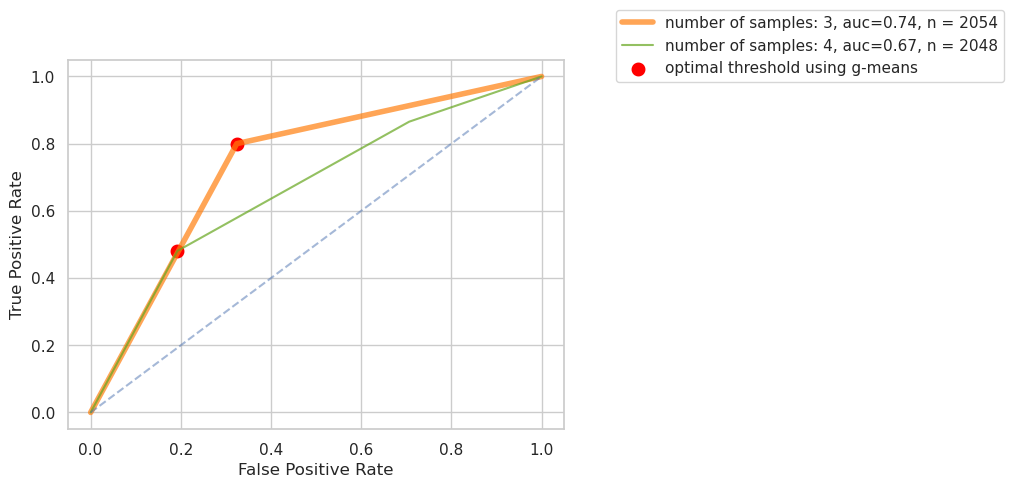

In [23]:
fig,ax = plot_roc(FPR_TRAIN[0:2],TPR_TRAIN[0:2],AUC_TRAIN[0:2], position_range[0:2]+1, N_TRAIN[0:2], auc_cutoff = 0.1)
ax.scatter(FPR_TRAIN[0][IDX_train[0]], TPR_TRAIN[0][IDX_train[0]], color = 'red', lw = 4, label="optimal threshold using g-means")
ax.scatter(FPR_TRAIN[1][IDX_train[1]], TPR_TRAIN[1][IDX_train[1]], color = 'red', lw = 4)
ax.get_legend().remove()
fig.legend(bbox_to_anchor=(0.6,1,1,0))
fig.show()
fig.savefig(f'{FIG_DIR}gmean_demo_{stimdur}.png', dpi=300, bbox_inches='tight')


/home/jenny/evidence-chain/analysis/analysis_util.py:216: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(
/home/jenny/evidence-chain/analysis/analysis_util.py:220: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot([i + 1 for i in position_of_samples], auc_list_test, "-o", label="Test",alpha=alpha,marker =marker, markeredgecolor=markeredgecolor)
/tmp/ipykernel_10336/4033406557.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


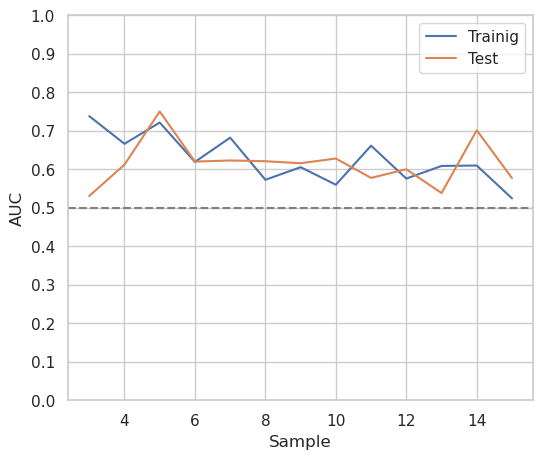

In [24]:
fig, ax = plot_roc_per_sample_position(POSITION_OF_SAMPLES, AUC_TRAIN, AUC_TEST)
ax.axhline(y=0.5, color ='grey', ls='--')
# ax.set_xticks([i+1 for i in POSITION_OF_SAMPLES])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_yticks(np.arange(0,1.1,0.1))
fig.set_size_inches(6, 5)
fig.savefig(f'{FIG_DIR}auc_lines_{stimdur}.png', dpi=300,bbox_inches='tight')

fig.show()

/tmp/ipykernel_10336/3980573731.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


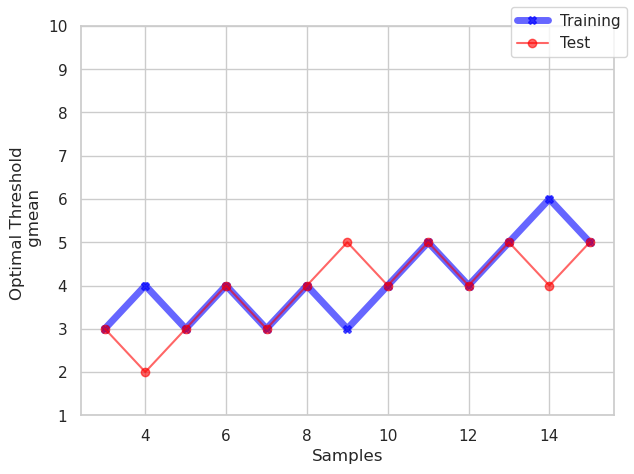

In [25]:
fig, ax = plt.subplots(1,1)
ax.plot(position_range+1, [i for i in GMEANS_train], linewidth=5, marker = 'X', alpha=0.6, color='blue', label = 'Training')
ax.plot(position_range+1, [i for i in GMEANS_test], marker = 'o', alpha=0.6, color= 'red', label = 'Test')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel("Samples")
ax.set_ylabel("Optimal Threshold \n gmean")

ax.set_ylim(1,10)
fig.legend()
fig.tight_layout()
fig.savefig(f'{FIG_DIR}threshold_per_sample_{stimdur}.png', dpi=300,bbox_inches='tight')
fig.show()



In [26]:
position_range

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

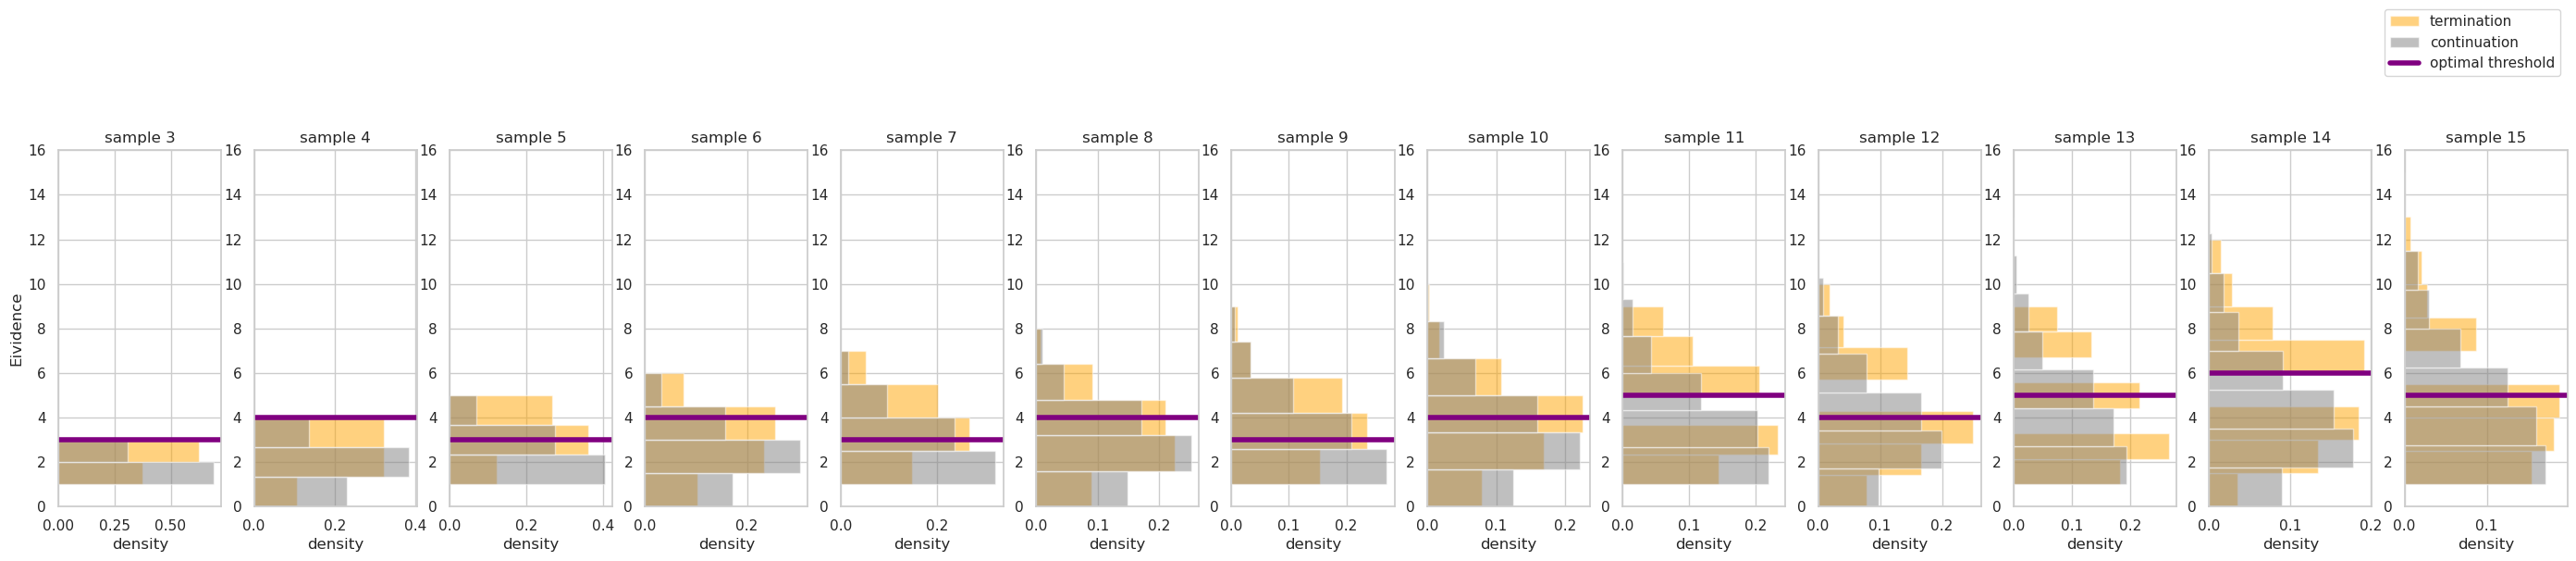

In [27]:
fig, ax = plt.subplots(1,len(position_range),figsize = (35,5))
my_labels =['termination', 'continuation', 'optimal threshold']

for i, p in enumerate(position_range):
    dataset, dataset_resp = make_dataset(p, count, chain_matrix)  
    bound = get_abs_evidence(dataset)[:,-1]
    bound_stopped = bound[dataset_resp]
    bound_cont = bound[~dataset_resp]
    nbins = len(np.unique(bound_cont))

    ax[i].hist(bound_stopped, density = True, orientation="horizontal",alpha=0.5, color = 'orange', label = my_labels[0], bins =nbins, )
    ax[i].hist(bound_cont, density = True,orientation="horizontal", alpha=0.5, color = 'grey', label = my_labels[1],  bins =nbins)
    ax[i].yaxis.set_major_locator(MaxNLocator(integer=True))
    ax[i].axhline(GMEANS_train[i], color = 'purple', linewidth = 4, label = my_labels[2])
    ax[i].set_ylim(0,16)
    my_labels = ['__nolabels__']*3
    ax[i].set_xlabel('density')
    if i ==0:
        ax[i].set_ylabel('Eividence')
    ax[i].set_title(f"sample {p+1}")
fig.legend(bbox_to_anchor=(0.9,0.2,0,1))
fig.subplots_adjust(hspace=0.2)
fig.savefig(f'{FIG_DIR}bound_dist_per_sample_{stimdur}.png', dpi=300,bbox_inches='tight')




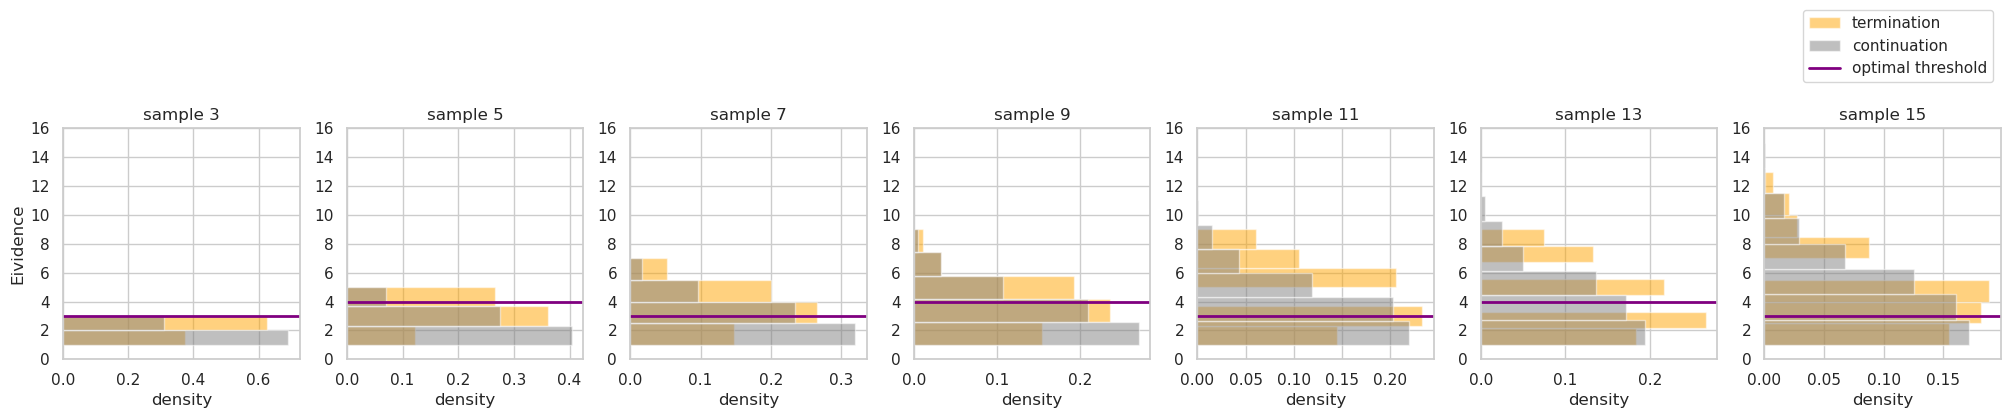

In [28]:
fig, ax = plt.subplots(1,len(position_range)//2+1,figsize = (25,3))
my_labels =['termination', 'continuation', 'optimal threshold']

counter = 0
for i, p in enumerate(position_range):
    if i%2 ==0:
        i = counter
        counter += 1
        dataset, dataset_resp = make_dataset(p, count, chain_matrix)  
        bound = get_abs_evidence(dataset)[:,-1]
        bound_stopped = bound[dataset_resp]
        bound_cont = bound[~dataset_resp]
        nbins = len(np.unique(bound_cont))

        ax[i].hist(bound_stopped, density = True, orientation="horizontal",alpha=0.5, color = 'orange', label = my_labels[0], bins =nbins, )
        ax[i].hist(bound_cont, density = True,orientation="horizontal", alpha=0.5, color = 'grey', label = my_labels[1],  bins =nbins)
        ax[i].yaxis.set_major_locator(MaxNLocator(integer=True))
        ax[i].axhline(GMEANS_train[i], color = 'purple', linewidth = 2, label = my_labels[2])
        ax[i].set_ylim(0,16)
        my_labels = ['__nolabels__']*3
        ax[i].set_xlabel('density')
        if i ==0:
            ax[i].set_ylabel('Eividence')
        ax[i].set_title(f"sample {p+1}")
fig.legend(bbox_to_anchor=(0.9,0.3,0,1))
fig.subplots_adjust(hspace=0.2)
fig.savefig(f'{FIG_DIR}bound_dist_per_sample_{stimdur}_reduced.png', dpi=300,bbox_inches='tight')


In [29]:
columns = ['sample', 'bound', 'resp']
df = pd.DataFrame({
    'sample': [],
    'bound': [],
    'resp': []
})
for p in position_range:
    dataset, dataset_resp = make_dataset(p, count, chain_matrix)  
    bound = get_abs_evidence(dataset)[:,-1]
    bound_stopped = bound[dataset_resp]
    bound_cont = bound[~dataset_resp]

    new_df = pd.DataFrame({
        'bound': bound,
        'resp': dataset_resp,
        'sample': p+1
    })
    df = pd.concat([df, new_df])


In [30]:
# fig, ax = plt.subplots(figsize = (20,5))
# ax.yaxis.set_major_locator(MaxNLocator(integer=True))
# df1 = df[df['resp']==True]
# sns.histplot(df1,
#     x='sample', y ='bound', hue = 'resp',


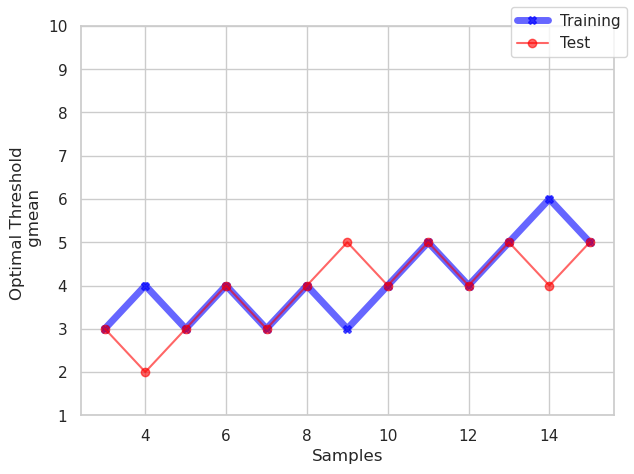

In [31]:
from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots(1,1)
ax.plot(position_range+1, [i for i in GMEANS_train], linewidth=5, marker = 'X', alpha=0.6, color='blue', label = 'Training')
ax.plot(position_range+1, [i for i in GMEANS_test], marker = 'o', alpha=0.6, color= 'red', label = 'Test')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel("Samples")
ax.set_ylabel("Optimal Threshold \n gmean")



ax.set_ylim(1,10)
fig.legend()
fig.tight_layout()
fig.savefig(f'{FIG_DIR}threshold_per_sample_{stimdur}.png', dpi=300,bbox_inches='tight')



/tmp/ipykernel_10336/925363279.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


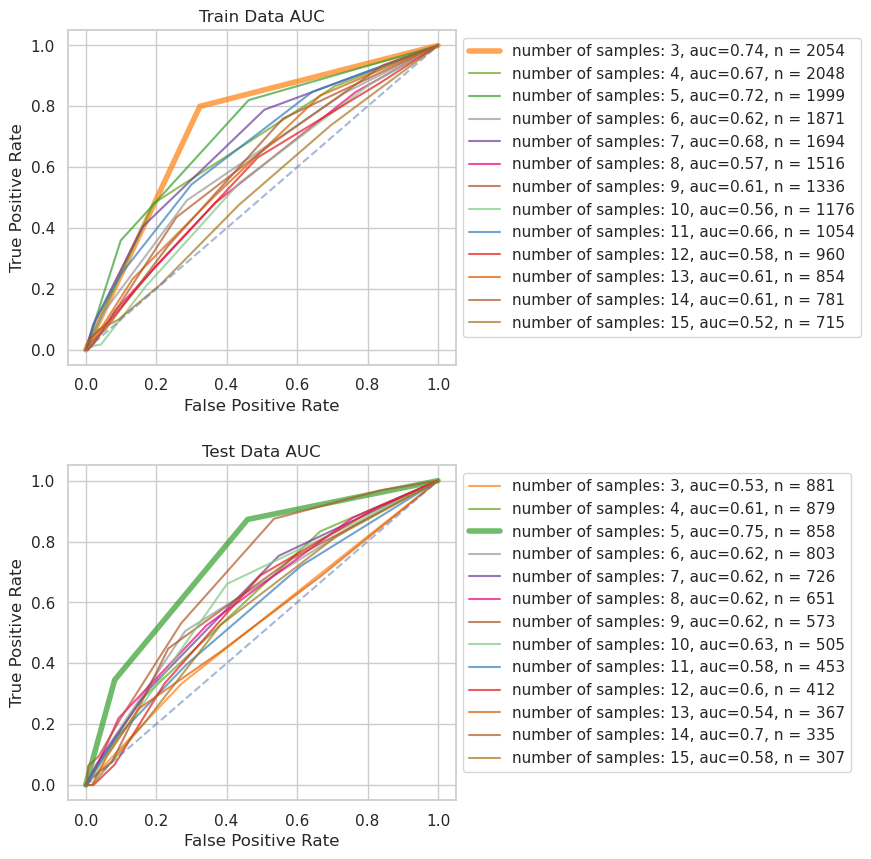

In [32]:
fig, ax = plt.subplots(2,1,figsize = (5,10))
_,ax0 = plot_roc(FPR_TRAIN,TPR_TRAIN,AUC_TRAIN, position_range+1, N_TRAIN, auc_cutoff = 0.5, ax=ax[0])
_,ax1 = plot_roc(FPR_TEST,TPR_TEST,AUC_TEST, position_range+1, N_TEST, auc_cutoff = 0.5, ax=ax[1])
ax0.set_title("Train Data AUC")
ax1.set_title("Test Data AUC")
fig.subplots_adjust(hspace=0.3)
fig.show()
fig.savefig(f'{FIG_DIR}auc_curve_{stimdur}.png', dpi=300,bbox_inches='tight')



In [33]:
print("training data")
print([np.round(i,2) for i in AUC_TRAIN])

print("test data")
print([np.round(i,2) for i in AUC_TEST])


training data
[0.74, 0.67, 0.72, 0.62, 0.68, 0.57, 0.61, 0.56, 0.66, 0.58, 0.61, 0.61, 0.52]
test data
[0.53, 0.61, 0.75, 0.62, 0.62, 0.62, 0.62, 0.63, 0.58, 0.6, 0.54, 0.7, 0.58]


In [34]:
x_train.shape

(715, 15)

In [35]:
ind_auc = [i for i, j in enumerate(AUC_TRAIN) if j>0.5 and (AUC_TEST[i]) >0.5]

In [37]:

[i for i in GMEANS_train]

[3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 4.0, 5.0, 4.0, 5.0, 6.0, 5.0]

In [38]:
p= 0.62
n = position_range+1
expected_sn = n * (2*p-1)

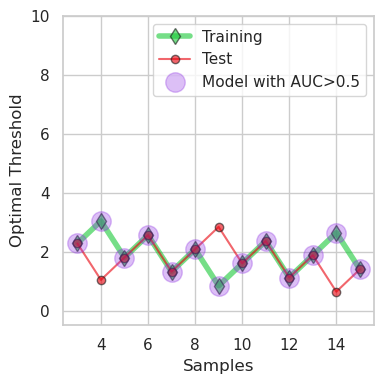

In [39]:
fig, ax = plt.subplots(1, figsize = (4,4))

ax.plot(position_range+1, np.array([i for i in GMEANS_train])-expected_sn, linewidth=4, marker = 'd', markeredgecolor="k", alpha=alpha, color = color_train, label = 'Training',  markersize =8)
ax.plot(position_range+1, np.array([i for i in GMEANS_test])-expected_sn, marker = 'o',markeredgecolor="k",  alpha=alpha, color=color_test, label = 'Test')
ax.plot(position_range[ind_auc]+1, np.array(GMEANS_train)[ind_auc]-expected_sn[ind_auc], linestyle='None',  marker = 'o', 
          alpha=0.3, color = colors_b[4],markersize=14, label="Model with AUC>0.5")




ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel("Samples")
ax.set_ylabel("Optimal Threshold")
ax.set_ylim(-0.5,10)
ax.legend()
fig.tight_layout()

fig.savefig(f'{FIG_DIR}threshold_expectation{stimdur}.png', dpi=300)


In [40]:
stimDur

NameError: name 'stimDur' is not defined